<a href="https://colab.research.google.com/github/anurag1504t/MachineLearning/blob/main/2018BCS_011_ML_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Lab Assignment - 1

In [ ]:
# Several helpful packages to load in 
import numpy as np;
import matplotlib.pyplot as plt;
import math;
from random import randrange

# Global variables
n=20;             # No of points in Dataset
xpoints=[];       # Independent 
ypoints=[];       # Dependent

## Training Dataset

In [ ]:
# Gaussian Noise Generation
noise=np.random.normal(0,1,n);
print(noise)

[ 0.42856329  0.07713013  0.21869637  1.5214245  -0.52281194 -0.15694554
 -0.12528184  0.19239826 -0.1183072   0.70431708 -0.07191924  0.63146333
 -0.06720386 -0.30460683  0.48371231 -1.17651312  1.23538969 -1.19480096
  1.35955607 -0.26894039]


In [ ]:
# Generation of Random Dataset. y = sin(x) + noise
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    xpoints.append(x);
    ypoints.append((math.sin(x)+noise[i]));

xpoints = np.array(xpoints)
ypoints = np.array(ypoints)

xpoints = xpoints.reshape(20,1)
ypoints = ypoints.reshape(20,1)

In [ ]:
print('Randomly Generated Dataset with 20 points')
print('X | Y');
for i in range(0,n):
  print(xpoints[i] , ' | ' , ypoints[i]);

Randomly Generated Dataset with 20 points
X | Y
[3.76991118]  |  [-0.15922196]
[0.31415927]  |  [0.38614713]
[1.25663706]  |  [1.16975289]
[2.51327412]  |  [2.10920975]
[1.88495559]  |  [0.42824457]
[2.19911486]  |  [0.65207146]
[5.02654825]  |  [-1.07633836]
[4.08407045]  |  [-0.61661874]
[1.88495559]  |  [0.83274931]
[5.34070751]  |  [-0.10469992]
[2.51327412]  |  [0.51586601]
[0.31415927]  |  [0.94048032]
[2.82743339]  |  [0.24181313]
[4.39822972]  |  [-1.25566335]
[3.14159265]  |  [0.48371231]
[4.08407045]  |  [-1.98553012]
[4.08407045]  |  [0.4263727]
[4.39822972]  |  [-2.14585747]
[4.71238898]  |  [0.35955607]
[5.02654825]  |  [-1.21999691]


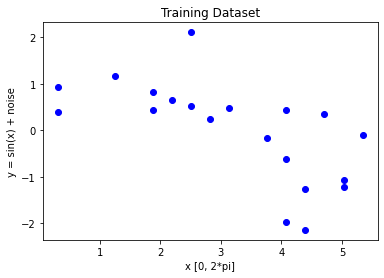

In [ ]:
# Plot of Dataset
plt.plot(xpoints,ypoints,'bo');
plt.xlabel('x [0, 2*pi]');
plt.ylabel('y = sin(x) + noise');
plt.title('Training Dataset');
plt.show()

## Testing Dataset

In [ ]:
# Variables
x_test = []
y_test = []

# Generation of Random Dataset. y = sin(x) 
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x_test.append(x);
    y_test.append(math.sin(x));

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test = x_test.reshape(20,1)
y_test = y_test.reshape(20,1)

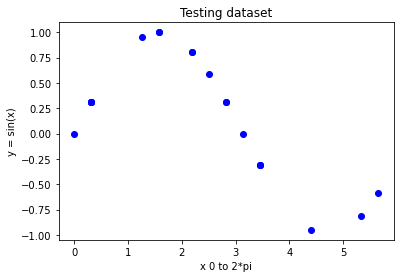

In [ ]:
# Plot of Testing Dataset
plt.plot(x_test,y_test,'bo');
plt.xlabel('x 0 to 2*pi');
plt.ylabel('y = sin(x)');
plt.title('Testing dataset');
plt.show()

## Simple Linear Regression



In [ ]:
# Fitting Simple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xpoints, ypoints)

# Predicting the Test set results
y_pred = regressor.predict(x_test)

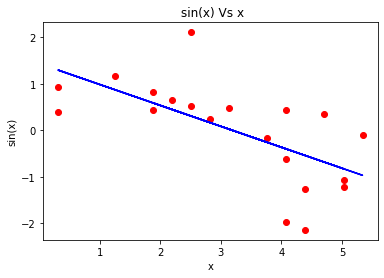

In [ ]:
# Visualising the Training set results
plt.scatter(xpoints, ypoints, color = 'red')
plt.plot(xpoints, regressor.predict(xpoints), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

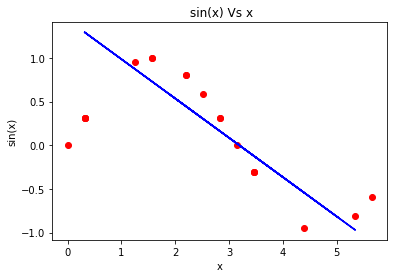

In [ ]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(xpoints, regressor.predict(xpoints), color = 'blue')
plt.title(' sin(x) Vs x')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.35285942425195926

## Multiple Linear Regression

### Training Data

In [ ]:
# Variable Declarations
x1_train = xpoints        # First Independent Variable
x2_train = []             # Second Independent Variable
ym_train = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) + noise
for i in range(0,n):
    x=randrange(0,n+1)*2*math.pi/n;
    x2_train.append(x);
    ym_train.append((math.sin(x) + math.sin(x1_train[i]) + noise[i]));

x2_train = np.array(x2_train)
ym_train = np.array(ym_train)

x2_train = x2_train.reshape(20,1)
ym_train = ym_train.reshape(20,1)

xm_train = np.column_stack((x1_train, x2_train))

In [ ]:
xm_train

array([[3.76991118, 5.96902604],
       [0.31415927, 5.96902604],
       [1.25663706, 3.14159265],
       [2.51327412, 0.62831853],
       [1.88495559, 5.34070751],
       [2.19911486, 0.        ],
       [5.02654825, 5.02654825],
       [4.08407045, 1.25663706],
       [1.88495559, 3.14159265],
       [5.34070751, 1.57079633],
       [2.51327412, 0.9424778 ],
       [0.31415927, 2.82743339],
       [2.82743339, 0.31415927],
       [4.39822972, 2.51327412],
       [3.14159265, 4.39822972],
       [4.08407045, 2.51327412],
       [4.08407045, 3.45575192],
       [4.39822972, 6.28318531],
       [4.71238898, 2.19911486],
       [5.02654825, 5.96902604]])

### Testing Dataset

In [ ]:
# Variable Declarations
x1_test = []        # First Independent Variable
x2_test = []             # Second Independent Variable
ym_test = []              # Dependent Variable

# Generation of Random Dataset. y = sin(x1) + sin(x2) 
for i in range(0,n):
    x1=randrange(0,n+1)*2*math.pi/n
    x2=randrange(0,n+1)*2*math.pi/n
    x1_test.append(x1)
    x2_test.append(x2)
    ym_test.append((math.sin(x1) + math.sin(x2)))

xm_test = np.column_stack((x1_train, x2_train))

In [ ]:
xm_test

array([[3.76991118, 5.96902604],
       [0.31415927, 5.96902604],
       [1.25663706, 3.14159265],
       [2.51327412, 0.62831853],
       [1.88495559, 5.34070751],
       [2.19911486, 0.        ],
       [5.02654825, 5.02654825],
       [4.08407045, 1.25663706],
       [1.88495559, 3.14159265],
       [5.34070751, 1.57079633],
       [2.51327412, 0.9424778 ],
       [0.31415927, 2.82743339],
       [2.82743339, 0.31415927],
       [4.39822972, 2.51327412],
       [3.14159265, 4.39822972],
       [4.08407045, 2.51327412],
       [4.08407045, 3.45575192],
       [4.39822972, 6.28318531],
       [4.71238898, 2.19911486],
       [5.02654825, 5.96902604]])

### Fitting Model

In [ ]:
# Fitting Multiple Linear Regression to the Training Dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xm_train, ym_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
ym_pred = regressor.predict(xm_test)

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(ym_test, ym_pred)

1.5387814117675487

## Polynomial Regression of Degree M

In [223]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(xpoints) 
  
poly.fit(x_poly, ypoints) 
lin2 = LinearRegression() 
lin2.fit(x_poly, ypoints)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [224]:
# poly.fit_transform(xpoints)

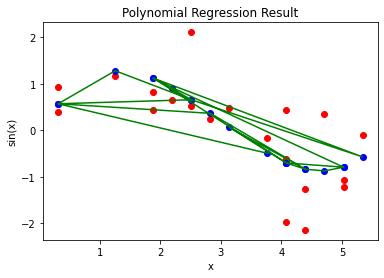

In [225]:
# Visualising the Polynomial Regression results 
plt.scatter(xpoints, ypoints, color = 'red') 
  
plt.scatter(xpoints, lin2.predict(poly.fit_transform(xpoints)), color = 'blue')
plt.plot(xpoints, lin2.predict(poly.fit_transform(xpoints)), color = 'green') 
plt.title('Polynomial Regression Result') 
plt.xlabel('x') 
plt.ylabel('sin(x)') 
  
plt.show()

In [ ]:
mean_squared_error(ypoints,lin2.predict(poly.fit_transform(xpoints)))

0.5035526152318752

## Ridge Regression

In [ ]:
# Fitting Ridge Regression to the dataset 
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(xpoints, ypoints) 

# Predicting the test set Results
y_pred_rr= rr.predict(x_test)


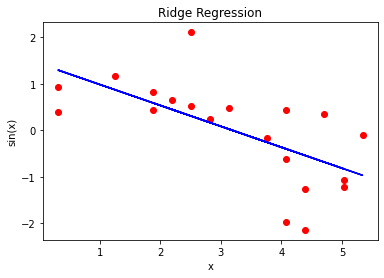

In [ ]:
# Visualising the Training set results
plt.scatter(xpoints, ypoints, color = 'red')
plt.plot(xpoints, rr.predict(xpoints), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

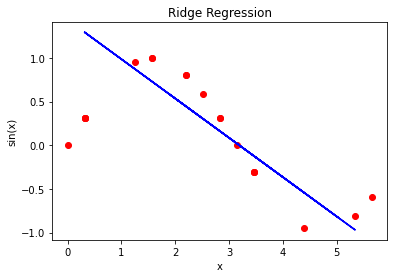

In [ ]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(xpoints, rr.predict(xpoints), color = 'blue')
plt.title('Ridge Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_rr)

0.3527110627808227

## LASSO Regression

In [ ]:
# Fitting LASSO Regression to the dataset 
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(xpoints, ypoints) 

# Predicting the test set Results
y_pred_lasso= model_lasso.predict(x_test)


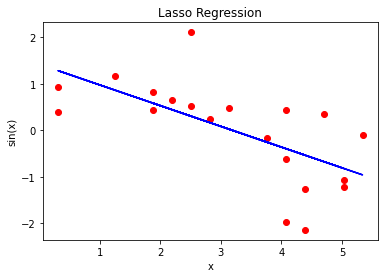

In [ ]:
# Visualising the Training set results
plt.scatter(xpoints, ypoints, color = 'red')
plt.plot(xpoints, model_lasso.predict(xpoints), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

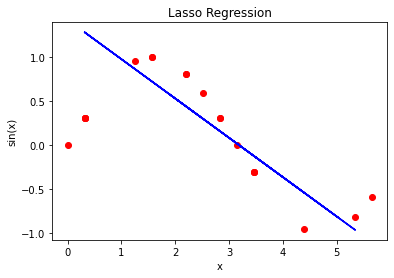

In [ ]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(xpoints, model_lasso.predict(xpoints), color = 'blue')
plt.title('Lasso Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_lasso)

0.346335957706666

## Elastic-Net Regression

In [ ]:
# Fitting ElasticNet Regression to the dataset
from sklearn.linear_model import ElasticNet
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(xpoints, ypoints) 

# Predicting the test set Results
y_pred_enet= model_enet.predict(x_test)

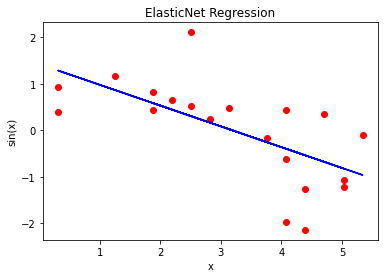

In [ ]:
# Visualising the Training set results
plt.scatter(xpoints, ypoints, color = 'red')
plt.plot(xpoints, model_enet.predict(xpoints), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

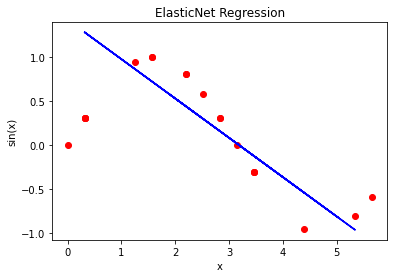

In [ ]:
# Visualising the Testing set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(xpoints, model_enet.predict(xpoints), color = 'blue')
plt.title('ElasticNet Regression')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [ ]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_enet)

0.34812556047594245

## Bridge Regression